# Class 8: pandas Series and Data Frames

Today we will discuss pandas Series and DataFrames which allow us to analyze data tables.

In [73]:
import YData

# YData.download.download_class_code(8)       # get class code    
# YData.download.download_class_code(8, True) # get the code with the answers 
# YData.download_homework(4)  # download the homework 


In [74]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')


### Downloading the data for today's class

Please run the code in the cell below to download the data for today's class.

In [75]:
import YData

YData.download_image("chili.jpg")
YData.download_data("nba_salaries_2022_23.csv")
YData.download_data("nyc23_flights.csv")
YData.download_data("nyc23_airlines.csv")
YData.download_data("monthly_egg_prices.csv")

The file `chili.jpg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_flights.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nyc23_airlines.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `monthly_egg_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [76]:
# import the numpy package
import numpy as np
import matplotlib.pyplot as plt

## Boolean masking warm-up exercise

As a warm-up exercise, please calculate the total salary for players on the Boston Celtics and on the Golden State Warriors to see which team spent the most money on salaries. 

Hint: If you're stuck a useulf first step would be to create a Boolean masks indicating which players are on the Celtics...


In [77]:
# Extract the necessary data

# Load the NBA data as a pandas data frame
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data
nba.head()


# Extract ndarrays for salary and position 
salary_array = nba["SALARY"].values
team_array = nba["TEAM"].values

np.unique(team_array)


array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Bobcats', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Hornets', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

In [78]:
# Calculate the total salary for players on the Boston Celtics

celtics_mask = team_array == 'Boston Celtics'
celtics_salaries = salary_array[celtics_mask]
print(np.sum(celtics_salaries))


# Calculate the total salary for players on the Golden State Warriors

warriors_mask = team_array == 'Golden State Warriors'
warriors_salaries = salary_array[warriors_mask]
print(np.sum(warriors_salaries))



175.88349499999998
209.554954


## Quick review of higher dimensional arrays and image processing

Let's do a quick review/continuation of higher dimensional arrays and image processing since we did not have much time to cover this last class. 



In [79]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [80]:
# slicing to get a submatrix 
my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [81]:
my_matrix2 = my_matrix.copy()  # copy the matrix
my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2

array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [82]:
# sum down the rows 
np.sum(my_matrix, axis = 0)

array([12, 15, 18])

In [83]:
# create a boolean array for all values less than 5
my_matrix < 5

array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

### Image processing

Let's create a 100 x 300 image that is all [Yale Blue](https://en.wikipedia.org/wiki/Yale_Blue), which has RGB values of (0, 53, 107)

We will then do a few last manipulations on an actual image. 

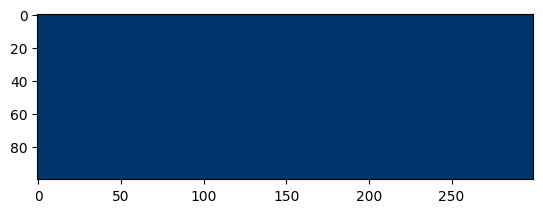

In [84]:
# Image processing

# Let's create an 100 x 300 image that is all Yale blue

color_image = np.zeros((100, 300, 3), dtype = int)  # Start with an image of all zeros

# The red channel is 0, so we don't need to modify our image of zeros for this channel

# Let's set the other color channels
color_image[:, :, 1] = 53   # Green
color_image[:, :, 2] = 107


# Let's display the image
plt.imshow(color_image); 


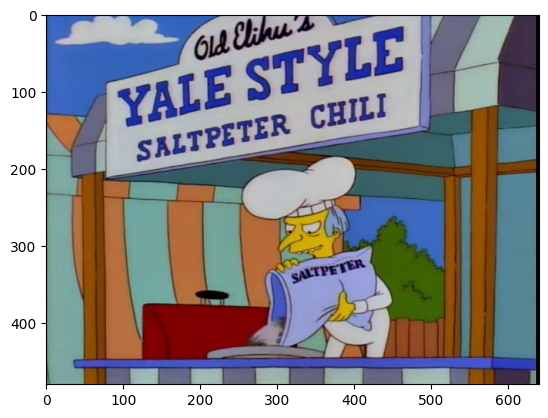

In [85]:
# Load in a real image

from imageio.v3 import imread

I = imread("chili.jpg")

plt.imshow(I);

In [86]:
# get the type and shape of the image
print(I.dtype)
I.shape

uint8


(480, 640, 3)

(480, 640)


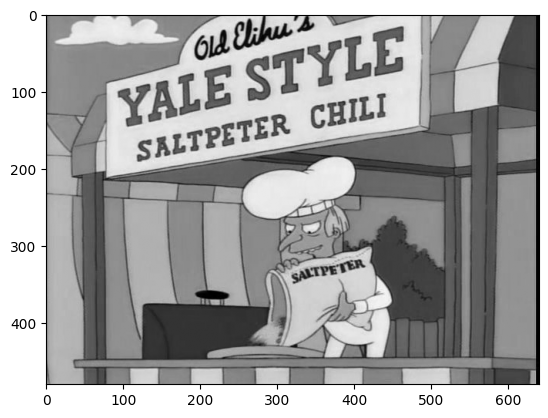

In [87]:
# To create a grayscale image - use the average value in all three r, g, b channels

mean_image = np.mean(I, axis = 2)

print(mean_image.shape)

plt.imshow(mean_image, cmap='gray');


## Tuples

Tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 


In [88]:
# create a tuple

my_tuple = (10, 20, 30)

my_tuple


(10, 20, 30)

In [89]:
# we can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [90]:
# unlike a list, we can't reassign values in a tuple 
#my_tuple[1] = 50

In [91]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

## Dictionaries

Dictionaries allow us to look up values. In particular, we provide a "key" and the dictionary return a "value". 

We can create dictionaries using the syntax: 

`my_dict = {"key1": 1, "key2": 20}`


In [92]:
# create a dictionary

my_dict = {"key1": 1, "key2": 20}
my_dict

{'key1': 1, 'key2': 20}

In [93]:
# we can access elements using square brackets 
my_dict["key2"]

20

In [94]:
# values in dictionaries can be list
my_dict2 = {"a": [1, 2, 3, 4], "b": ["a", "b", "c"], "c": [True, False]}
my_dict2["c"]

[True, False]

In [95]:
# We can create a dictionary from two lists of the same length using the dict() and zip() functions

my_list = [1, 2, 3]
my_list2 = ["a", "b", "c"]


# turn the lists into a dictionary using the zip() and dict() functions

my_dict3 = dict(zip(my_list2, my_list))


print(my_dict3)

my_dict3["b"]


{'a': 1, 'b': 2, 'c': 3}


2

In [96]:
# Load the NBA data as a pandas data frame
import pandas as pd
nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data

# Extract ndarrays for salary and position 
salary_array = nba["SALARY"].values
player_array = nba["PLAYER"].values

print(salary_array[0:5])
print(player_array[0:5])

[ 9.835881  2.79264   3.53616   0.508891 23.5     ]
["De'Andre Hunter" 'Jalen Johnson' 'AJ Griffin' 'Trent Forrest'
 'John Collins']


In [97]:
# create a dictionary between players and their salaries
player_salaries = dict(zip(player_array, salary_array))

# what is Stephen Curry's salary? 
player_salaries["Stephen Curry"]

np.float64(48.070014)

## Pandas 

pandas Series are: 0ne-dimensional ndarray with axis labels

pands DataFrame are: Table data

Let's look at the egg price data...


In [98]:
# import the numpy package
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [99]:
# import YData
# YData.download_data("monthly_egg_prices.csv");
# #reading in a series by parsing the dates, and using .squeeze() to conver to a Series
# egg_prices_series = pd.read_csv("monthly_egg_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col="DATE").squeeze()
# egg_prices_series


from pandas_datareader.fred import FredReader
#egg_prices_series = FredReader("APU0000708111", start='1980-01-01', end='2023-12-01').read().squeeze()
egg_prices_series = FredReader("APU0000708111", start='1980-01-01', end='2025-09-01').read().squeeze()

egg_prices_series


DATE
1980-01-01    0.879
1980-02-01    0.774
1980-03-01    0.812
1980-04-01    0.797
1980-05-01    0.737
              ...  
2025-04-01    5.122
2025-05-01    4.548
2025-06-01    3.775
2025-07-01    3.599
2025-08-01    3.587
Name: APU0000708111, Length: 548, dtype: float64

In [100]:

# print the type
print(type(egg_prices_series))

# print the shape
print(egg_prices_series.shape)

# print the series
egg_prices_series


<class 'pandas.core.series.Series'>
(548,)


DATE
1980-01-01    0.879
1980-02-01    0.774
1980-03-01    0.812
1980-04-01    0.797
1980-05-01    0.737
              ...  
2025-04-01    5.122
2025-05-01    4.548
2025-06-01    3.775
2025-07-01    3.599
2025-08-01    3.587
Name: APU0000708111, Length: 548, dtype: float64

In [101]:
# get a value from the Series by an Index name using .loc
egg_prices_series.loc["1980-01-01"]

np.float64(0.879)

In [102]:
# get a value from the Series by index number using .iloc
egg_prices_series.iloc[0]

np.float64(0.879)

In [103]:
# use the .filter() method to get data from dates that contain "2023"
egg_prices_2023 = egg_prices_series.filter(like='2023')

# print the length 
print(len(egg_prices_2023))

egg_prices_2023

12


DATE
2023-01-01    4.823
2023-02-01    4.211
2023-03-01    3.446
2023-04-01    3.270
2023-05-01    2.666
2023-06-01    2.219
2023-07-01    2.094
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: APU0000708111, dtype: float64

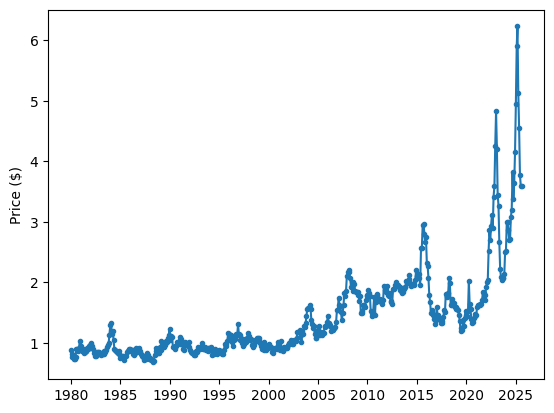

In [104]:
# Visualize the Series

plt.plot(egg_prices_series, ".-");
plt.ylabel("Price ($)");


In [105]:
# turn the index back into a column using .reset_index()
egg_prices_df = egg_prices_series.reset_index()

# get the type
print(type(egg_prices_df))

# print the values
egg_prices_df


<class 'pandas.core.frame.DataFrame'>


,DATE,APU0000708111
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812
3,1980-04-01,0.797
4,1980-05-01,0.737
...,...,...
543,2025-04-01,5.122
544,2025-05-01,4.548
545,2025-06-01,3.775
546,2025-07-01,3.599


## DataFrames!

The ability to manipulate data in tables is one of the most useful skills in Data Science. 

Pandas is the most popular package in Python for manipulating data tables so we will use this package for manipulating tables in this class. The syntax for Pandas can be a little tricky, so try to be patient if you run into errors, and as always, there should be plenty of help available at office hours and on Ed. 

As an example, let's look at flight information!

As you know, travel by airplane can be convenient because airplanes fly very fast. However, even though the airplanes themselves are fast, their scheduled departure times are often delayed, which can significantly add to ones travel time, and can be frustrating.

Let's analyze data on flights to gain insight into how best to avoid flight delays. In particular, we will look at airplane flights that left the airports in New York City, since these airports are some of the closest major airports to New Haven, and we will use pandas to do some quick explorations of the data to see if there are some ways to potentially avoid flight delays.

The code below loads the data into a pandas DataFrame named `flights` and sets the Index to be the airplane's [tail number](https://en.wikipedia.org/wiki/Tail_number). Some variables of interest in this DataFrame are:

- `year`, `month`, `day`: Date of departure 
- `dep_time`, `arr_time`: Actual departure and arrival times, [UTC](https://en.wikipedia.org/wiki/UTC_offset) 
- `sched_dep_time`, `sched_arr_time`: Scheduled departure and arrival times, UTC 
- `dep_delay`, `arr_delay`: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- `hour`, `minute`: Time of scheduled departure broken into hour and minutes.
- `carrier`: Two letter carrier abbreviation. See get_airlines to get the full name.
- `flight` Flight number.
- `origin`, `dest`: Origin and destination airport. See get_airports for additional metadata.
- `air_time`: Amount of time spent in the air, in minutes.
- `distance`: Distance between airports, in miles.
- `time_hour`: Scheduled date and hour of the flight as a POSIXct date. Along with origin, can be used to join flights data to weather data.

The first 5 rows of this DataFrame are shown below. 



In [106]:
#import YData
#YData.download_data("nyc23_flights.csv")

flights = pd.read_csv("nyc23_flights.csv", index_col="tailnum", parse_dates=[18])

flights.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
tailnum,,,,,,,,,,,,,,,,,,
N25201,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
N830DN,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
N807JB,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
N265JB,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
N17730,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00


In [107]:
# The head() method returns the first 5 rows. 
# Let's use the tail() method to get the last 5 rows.
# From looking at the output, can you tell what year the data goes back until? 

flights.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
tailnum,,,,,,,,,,,,,,,,,,
N647NK,2023,12,31,2218.0,2224,-6.0,304.0,325,-21.0,NK,364,EWR,SJU,203.0,1608,22,24,2023-12-31 22:00:00
N566JB,2023,12,31,2243.0,2150,53.0,143.0,56,47.0,B6,367,JFK,PBI,149.0,1028,21,50,2023-12-31 21:00:00
N793JB,2023,12,31,2248.0,2259,-11.0,338.0,350,-12.0,B6,283,JFK,PSE,207.0,1617,22,59,2023-12-31 22:00:00
N807JB,2023,12,31,2326.0,2325,1.0,412.0,405,7.0,B6,313,JFK,BQN,199.0,1576,23,25,2023-12-31 23:00:00
N994JL,2023,12,31,2345.0,2255,50.0,425.0,347,38.0,B6,126,JFK,SJU,201.0,1598,22,55,2023-12-31 22:00:00


In [108]:
# get the number of rows and columns in a DataFrame using the shape property
flights.shape

(435352, 18)

In [109]:
# get the types of all the columns using .dtypes
flights.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
dtype: object

In [110]:
# get the names of all the columns using .columns
print(flights.columns)

# we can convert these names to an numpy array using the .to_numpy() method
flights.columns.to_numpy()

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')


array(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'], dtype=object)

In [111]:
# get more info on the data frame using the .info() method
flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435352 entries, N25201 to N994JL
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            435352 non-null  int64         
 1   month           435352 non-null  int64         
 2   day             435352 non-null  int64         
 3   dep_time        424614 non-null  float64       
 4   sched_dep_time  435352 non-null  int64         
 5   dep_delay       424614 non-null  float64       
 6   arr_time        423899 non-null  float64       
 7   sched_arr_time  435352 non-null  int64         
 8   arr_delay       422818 non-null  float64       
 9   carrier         435352 non-null  object        
 10  flight          435352 non-null  int64         
 11  origin          435352 non-null  object        
 12  dest            435352 non-null  object        
 13  air_time        422818 non-null  float64       
 14  distance        435352 non-null  int

In [112]:
# get descriptive statistics on DataFrame using the .describe() method

flights.describe().round()   # round() the values, or can convert them to ints using astype("int")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,time_hour
count,435352.0,435352.0,435352.0,424614.0,435352.0,424614.0,423899.0,435352.0,422818.0,435352.0,422818.0,435352.0,435352.0,435352.0,435352
mean,2023.0,6.0,16.0,1366.0,1364.0,14.0,1497.0,1552.0,4.0,785.0,142.0,978.0,13.0,29.0,2023-06-29 10:02:22.386850560
min,2023.0,1.0,1.0,1.0,500.0,-50.0,1.0,1.0,-97.0,1.0,18.0,80.0,5.0,0.0,2023-01-01 05:00:00
25%,2023.0,3.0,8.0,931.0,930.0,-6.0,1105.0,1135.0,-22.0,364.0,77.0,479.0,9.0,10.0,2023-03-30 20:00:00
50%,2023.0,6.0,16.0,1357.0,1359.0,-2.0,1519.0,1551.0,-10.0,734.0,121.0,762.0,13.0,29.0,2023-06-27 08:00:00
75%,2023.0,9.0,23.0,1804.0,1759.0,10.0,1946.0,2007.0,9.0,1188.0,177.0,1182.0,17.0,45.0,2023-09-27 11:00:00
max,2023.0,12.0,31.0,2400.0,2359.0,1813.0,2400.0,2359.0,1812.0,1972.0,701.0,4983.0,23.0,59.0,2023-12-31 23:00:00
std,0.0,3.0,9.0,498.0,478.0,54.0,550.0,513.0,58.0,497.0,89.0,703.0,5.0,20.0,NaN


### Selecting columns from a DataFrame

We can select columns from a DataFrame using the square brackets; e.g., `my_df["my_col"]`

If we'd like to select multiple columns we can pass a list; e.g., `my_df[["col1", "col2"]]`


In [113]:
# Get just the arrival delay
# Be careful: if you just use a ["Col_name"] it will return it as a Series!

arrival_delays = flights["arr_delay"]

arrival_delays


tailnum
N25201    205.0
N830DN     53.0
N807JB     34.0
N265JB    166.0
N17730    211.0
          ...  
N647NK    -21.0
N566JB     47.0
N793JB    -12.0
N807JB      7.0
N994JL     38.0
Name: arr_delay, Length: 435352, dtype: float64

In [114]:
# we can also get a single column using the .col_name 

arrival_delays2 =  flights.arr_delay

arrival_delays2

tailnum
N25201    205.0
N830DN     53.0
N807JB     34.0
N265JB    166.0
N17730    211.0
          ...  
N647NK    -21.0
N566JB     47.0
N793JB    -12.0
N807JB      7.0
N994JL     38.0
Name: arr_delay, Length: 435352, dtype: float64

In [115]:
# if you want to get a single column as a DataFrame, pass a list in the [] brackets

arrival_delays_df = flights[["arr_delay"]]

arrival_delays_df.head()  


,arr_delay
tailnum,
N25201,205.0
N830DN,53.0
N807JB,34.0
N265JB,166.0
N17730,211.0


In [116]:
# get multiple columns as a DataFrame

depart_arrival_delay = flights[["dep_delay", "arr_delay"]]

depart_arrival_delay


,dep_delay,arr_delay
tailnum,,
N25201,203.0,205.0
N830DN,78.0,53.0
N807JB,47.0,34.0
N265JB,173.0,166.0
N17730,228.0,211.0
...,...,...
N647NK,-6.0,-21.0
N566JB,53.0,47.0
N793JB,-11.0,-12.0


In [117]:
# to make it a little easier to see our results going forward, let's just select the following columns: 

flights_copy = flights.copy()

flights = flights[['arr_delay', 'dep_delay', 'carrier', 'flight', 'arr_time', 'dep_time',  'origin', 'dest', 'air_time', 'distance', 'time_hour']]

flights.head(3)

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00


### Getting a subset of rows from a DataFrame

Similar to pandas Series, we can get particular rows from a DataFrame using:

- `.loc`:  Get rows by Index values - and by Boolean masks
- `.iloc`.:  Get rows by their index number



In [118]:
# Extract rows based on the Index name "N25201"

flights.loc["N25201"]


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N25201,-4.0,1.0,UA,683,1712.0,1411.0,EWR,IAH,213.0,1400,2023-01-07 14:00:00
N25201,9.0,17.0,UA,542,1602.0,1452.0,EWR,BOS,49.0,200,2023-01-18 14:00:00
N25201,108.0,115.0,UA,580,53.0,2224.0,EWR,ATL,119.0,746,2023-01-19 20:00:00
N25201,6.0,7.0,UA,320,1452.0,1155.0,EWR,MCO,149.0,937,2023-01-20 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...
N25201,2.0,11.0,UA,137,1913.0,1649.0,EWR,JAX,113.0,820,2023-12-15 16:00:00
N25201,3.0,2.0,UA,565,2315.0,2159.0,EWR,ROC,44.0,246,2023-12-16 21:00:00
N25201,34.0,17.0,UA,692,1215.0,852.0,EWR,PBI,172.0,1023,2023-12-17 08:00:00


In [119]:
# Extract a row based on the row number (get row 0 to 3)
flights.iloc[0:3]

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00


In [120]:
# We can get multiple rows that meet particular conditions using Boolean masking

# flights leaving JFK
left_jfk = flights["origin"] == "JFK"

print(left_jfk)

np.sum(left_jfk)

tailnum
N25201    False
N830DN     True
N807JB     True
N265JB     True
N17730    False
          ...  
N647NK    False
N566JB     True
N793JB     True
N807JB     True
N994JL     True
Name: origin, Length: 435352, dtype: bool


np.int64(133048)

In [121]:
# extract the rows the correspond to JFK
jfk_flights = flights.loc[left_jfk]   # actually works even without the .loc

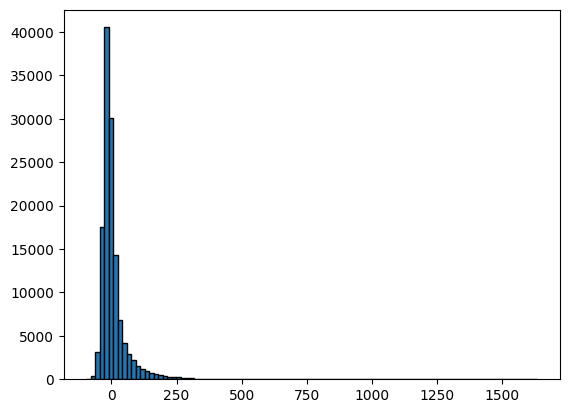

In [122]:
import matplotlib.pyplot as plt

# visualize JFK flight delays as a histogram
plt.hist(jfk_flights["arr_delay"], bins = 100, edgecolor = "k");


### Sorting values in a DataFrame

We can sort values in a DataFrame using `.sort_values("col_name")`

We can sort from highest to lowest by setting the argument `ascending = False`


In [123]:
# Sort the data by arrival delay

flights.sort_values("arr_delay").head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N535DN,-97.0,-7.0,DL,114,1054.0,838.0,JFK,SAN,299.0,2446,2023-12-25 08:00:00
N535DN,-96.0,-3.0,DL,157,2208.0,1956.0,JFK,SAN,296.0,2446,2023-12-26 19:00:00
N980JT,-92.0,-1.0,B6,242,1823.0,1547.0,JFK,SFO,312.0,2586,2023-06-07 15:00:00
N102NN,-92.0,-8.0,AA,336,1118.0,907.0,JFK,SNA,289.0,2454,2023-04-11 09:00:00
N706TW,-91.0,-11.0,DL,89,1941.0,1659.0,JFK,SFO,321.0,2586,2023-12-26 17:00:00


In [124]:
# What is the longest arrival delay? 

flights.sort_values("arr_delay", ascending = False).head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
tailnum,,,,,,,,,,,
N195UW,1812.0,1813.0,AA,645,2155.0,1953.0,EWR,CLT,86.0,529,2023-12-17 13:00:00
N958NN,1772.0,1781.0,AA,992,1407.0,1240.0,EWR,ORD,102.0,719,2023-10-01 06:00:00
N808AW,1737.0,1742.0,AA,518,1315.0,1201.0,LGA,DCA,42.0,214,2023-04-25 06:00:00
N967AN,1647.0,1665.0,AA,600,2352.0,2045.0,LGA,DFW,223.0,1389,2023-02-07 17:00:00
N153UW,1633.0,1627.0,AA,322,1135.0,926.0,JFK,CLT,80.0,541,2023-04-20 06:00:00


### Adding new columns to a Data Frame

We can add a column to a data frame using square backets. For example: 

- `my_df["new col"] = my_df["col1"] + my_df["col2"]`.




Let's add a column called "madeup_time" which has the reduction in delay from when the flight left (`dep_delay`) to when it arrived (`arr_delay`).

In [125]:
# copy the data 
flights2 = flights.copy()

# calculate how many minutes were made up in flight
madeup_time = flights2["dep_delay"] - flights2["arr_delay"]


# add change column
flights2["madeup_time"] =  madeup_time


flights2.head()

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00,-2.0
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00,25.0
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00,13.0
N265JB,166.0,173.0,B6,1053,238.0,33.0,JFK,CHS,108.0,636,2023-01-01 21:00:00,7.0
N17730,211.0,228.0,UA,219,223.0,36.0,EWR,DTW,80.0,488,2023-01-01 20:00:00,17.0


In [126]:
# sort the values
display(flights2.sort_values("madeup_time").head())


# sort the data from largest to smallest
display(flights2.sort_values("madeup_time", ascending = False).head())


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N241SY,317.0,-4.0,OO,1257,2145.0,1451.0,JFK,IAD,64.0,228,2023-09-08 14:00:00,-321.0
N518DQ,287.0,13.0,DL,278,334.0,1912.0,JFK,PHX,597.0,2153,2023-11-10 18:00:00,-274.0
N605JB,241.0,11.0,B6,245,114.0,1838.0,JFK,LAS,281.0,2248,2023-07-29 18:00:00,-230.0
N410UA,191.0,-14.0,UA,214,2112.0,1445.0,EWR,AUS,245.0,1504,2023-04-15 14:00:00,-205.0
N952NK,293.0,92.0,NK,340,2057.0,1429.0,EWR,FLL,165.0,1065,2023-09-08 12:00:00,-201.0


,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,madeup_time
tailnum,,,,,,,,,,,,
N706NK,279.0,380.0,NK,292,2104.0,1850.0,LGA,DFW,169.0,1389,2023-07-25 12:00:00,101.0
N535DN,-96.0,-3.0,DL,157,2208.0,1956.0,JFK,SAN,296.0,2446,2023-12-26 19:00:00,93.0
N976JT,-57.0,35.0,B6,242,1858.0,1623.0,JFK,SFO,309.0,2586,2023-06-13 15:00:00,92.0
N980JT,-92.0,-1.0,B6,242,1823.0,1547.0,JFK,SFO,312.0,2586,2023-06-07 15:00:00,91.0
N535DN,-97.0,-7.0,DL,114,1054.0,838.0,JFK,SAN,299.0,2446,2023-12-25 08:00:00,90.0


We can rename columns by:
1. Creating a `rename_dictionary` dictionary that maps old column names to new column names
2. By passing this dictionary to the `my_df.rename(columns = rename_dictionary)` method

In [127]:
# Rename the Percent change column
rename_dictionary = {"madeup_time": "delay_reduction"}
flights2 = flights2.rename(columns = rename_dictionary)
flights2.head(3)

,arr_delay,dep_delay,carrier,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,delay_reduction
tailnum,,,,,,,,,,,,
N25201,205.0,203.0,UA,628,328.0,1.0,EWR,SMF,367.0,2500,2023-01-01 20:00:00,-2.0
N830DN,53.0,78.0,DL,393,228.0,18.0,JFK,ATL,108.0,760,2023-01-01 23:00:00,25.0
N807JB,34.0,47.0,B6,371,500.0,31.0,JFK,BQN,190.0,1576,2023-01-01 23:00:00,13.0


### Getting aggregate statistics by group

We can get aggregate statistics by group using `groupby()` and `agg` methods using the following syntax:

`my_df.groupby("col_name").agg("agg_function_name")`

Can you get the average delay for each airline? 


In [128]:
# What was the average delay for each airline? 

mean_delays = flights[["carrier", "arr_delay"]].groupby("carrier").agg("mean")

display(mean_delays.head())


mean_delays.sort_values("arr_delay", ascending = False).head()

,arr_delay
carrier,
9E,-2.231381
AA,5.272403
AS,0.084432
B6,15.612912
DL,1.644258


,arr_delay
carrier,
F9,26.243842
HA,21.414365
B6,15.612912
OO,13.711405
NK,9.888686


There are several ways to get multiple statistics by group. Perhaps the most useful way is to use the syntax:

<pre>
my_df.groupby("group_col_name").agg(
   new_col1 = ('col_name', 'statistic_name1'),
   new_col2 = ('col_name', 'statistic_name2'),
   new_col3 = ('col_name', 'statistic_name3')
)
</pre>


Let's create a DataFrame that has for each carrier:
1. The number of flights 
2. The max departure delay
3. The median arrival delay

In [129]:
flights.groupby('carrier').agg(
    num_flights = ('carrier', 'count'),
    max_dep_delay = ('dep_delay', 'max'),
    median_arr_delay = ('arr_delay', 'median')
)

,num_flights,max_dep_delay,median_arr_delay
carrier,,,
9E,54141,1136.0,-13.0
AA,40525,1813.0,-10.0
AS,7843,991.0,-12.0
B6,66169,1019.0,-4.0
DL,61562,1158.0,-12.0
F9,1286,1161.0,2.0
G4,671,1380.0,-14.0
HA,366,1101.0,9.0
MQ,357,161.0,-8.0


![grumpy](http://www.quickmeme.com/img/17/1702cb8d3730013bdff1203920324ab55a244f0061cfaa118af059b683e2d275.jpg)

### "Joining" DataFrames by Index

To explore joining DataFrames, let's load the airline names into a DataFrames into a DataFrame called `airline_names`. 

Let's also set the Index for both the `airline_names` and `flights` to be the airline carrier code. 

For demonstration purposes, let's also do the following: 

1. Reduce the `flights` DataFrame to only have information on American Airlines (AA), Jet Blue (B6) and United Air Lines Inc. (UA) and save it to the name `flights_3_carriers`.

2. Reduce `airline_names` to the first 10 entries (thus removing United Airlines), and save it to the name `airline_names_reduced` 



In [130]:
flights_3_carriers = flights.reset_index().set_index("carrier")

# just get flights from American Airlines (AA), Jet Blue (B6) and Delta (DL) 
flights_3_carriers = flights_3_carriers.loc[["AA", "B6", "UA"]].sort_values("time_hour")

flights_3_carriers.head()


,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
carrier,,,,,,,,,,,
AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00
UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00
B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00
UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00
B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00


In [60]:
airline_names = pd.read_csv("nyc23_airlines.csv", index_col = "carrier")
airline_names_reduced = airline_names.iloc[0:10]

airline_names_reduced

,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
F9,Frontier Airlines Inc.
G4,Allegiant Air
HA,Hawaiian Airlines Inc.
MQ,Envoy Air


When two DataFrames have the same Index values, we can use the `.join()` method to join them.

In [61]:
# Let's do a left join by setting how = "left"
left_joined = flights_3_carriers.join(airline_names_reduced, how = "left") 
left_joined

,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
carrier,,,,,,,,,,,,
AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,American Airlines Inc.
B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,JetBlue Airways
B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,JetBlue Airways
UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN
B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...
UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN
UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN
B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,JetBlue Airways


In [62]:
# Let's do a right join by setting how = "right"  
right_joined = flights_3_carriers.join(airline_names_reduced, how = "right") 
right_joined

,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
carrier,,,,,,,,,,,,
9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Endeavor Air Inc.
AA,N925AN,-7.0,3.0,499.0,808.0,503.0,EWR,MIA,154.0,1085.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N918AN,-25.0,-6.0,981.0,645.0,524.0,EWR,ORD,119.0,719.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N886NN,-14.0,-7.0,518.0,857.0,552.0,LGA,MIA,159.0,1096.0,2023-01-01 05:00:00,American Airlines Inc.
AA,N402AN,-13.0,-10.0,990.0,1004.0,649.0,LGA,MIA,163.0,1096.0,2023-01-01 06:00:00,American Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...
F9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Frontier Airlines Inc.
G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Allegiant Air
HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Hawaiian Airlines Inc.


### "Merging" DataFrames by column values

If we want to join by value in a column rather than by Index value we can use the `.merge()` method (which is very similar to the `.join()` method). 


In [63]:
# reset the index of flights_3_carriers
flights_3_carriers2 = flights_3_carriers.reset_index()
flights_3_carriers2.head(3)

,carrier,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00


In [64]:
# reset the index of airline_names_reduced
airline_names_reduced2 = airline_names_reduced.reset_index()
airline_names_reduced2.head(3)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.


In [65]:
# use the .merge() method to join the DataFrames

left_joined2 = flights_3_carriers2.merge(airline_names_reduced2, how = "left") 
left_joined2

,carrier,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,name
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,American Airlines Inc.
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,JetBlue Airways
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,JetBlue Airways
3,UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN
4,B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186330,UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN
186331,UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN
186332,B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,JetBlue Airways
186333,B6,N994JL,38.0,50.0,126,425.0,2345.0,JFK,SJU,201.0,1598,2023-12-31 22:00:00,JetBlue Airways


#### Merging with different column names

What if the columns we want to join on have different names, we can use the `left_on` and `right_on` arguments to specify which columns (i.e., keys) should be used to align the two DataFrames

In [66]:
flights_3_carriers3 = flights_3_carriers2.rename(columns = {"carrier": "Airline Code"})
flights_3_carriers3.head(3)

,Airline Code,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00


In [67]:
airline_names_reduced3 = airline_names_reduced2.rename(columns = {"carrier": "Code"})

airline_names_reduced3.head(3)

,Code,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.


In [68]:
# merge the DataFrames specifying the column names to join on

left_joined3 = flights_3_carriers3.merge(airline_names_reduced3, how = "left", left_on = "Airline Code", right_on = "Code") 
left_joined3

,Airline Code,tailnum,arr_delay,dep_delay,flight,arr_time,dep_time,origin,dest,air_time,distance,time_hour,Code,name
0,AA,N925AN,-7.0,3.0,499,808.0,503.0,EWR,MIA,154.0,1085,2023-01-01 05:00:00,AA,American Airlines Inc.
1,B6,N948JB,44.0,41.0,646,923.0,611.0,EWR,FLL,163.0,1065,2023-01-01 05:00:00,B6,JetBlue Airways
2,B6,N639JB,4.0,-10.0,800,905.0,549.0,JFK,PBI,164.0,1028,2023-01-01 05:00:00,B6,JetBlue Airways
3,UA,N13113,68.0,17.0,206,926.0,537.0,EWR,IAH,258.0,1400,2023-01-01 05:00:00,NaN,NaN
4,B6,N2043J,-1.0,10.0,996,948.0,520.0,JFK,BQN,192.0,1576,2023-01-01 05:00:00,B6,JetBlue Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186330,UA,N37308,-26.0,-8.0,471,2248.0,2147.0,EWR,PWM,44.0,284,2023-12-31 21:00:00,NaN,NaN
186331,UA,N27253,-22.0,3.0,565,2308.0,2207.0,EWR,ROC,42.0,246,2023-12-31 22:00:00,NaN,NaN
186332,B6,N793JB,-12.0,-11.0,283,338.0,2248.0,JFK,PSE,207.0,1617,2023-12-31 22:00:00,B6,JetBlue Airways
186333,B6,N994JL,38.0,50.0,126,425.0,2345.0,JFK,SJU,201.0,1598,2023-12-31 22:00:00,B6,JetBlue Airways


#### Example: Spelling out names of airlines with the longest delays

Please try to create a DataFrame where the Index name is the full airline name, and the columns are:
- `mean_delay`: Has the mean arrival delay for each airline
- `median_delay`: Has the median arrival delay for each airline
- `count`: The number of flights that went into these averages

To do this, start with the `flights`, and the `airline_names` DataFrames and go from there. Also, be sure your results are sorted from the largest mean delay to the smallest mean delay


In [69]:

flights_with_names = flights.merge(airline_names.reset_index(), how = "left")

flights_with_names.head()

flights_with_names.groupby("name").agg(mean_delay = ("arr_delay", "mean"),
                                       median_delay = ("arr_delay", "median"),
                                       count = ("arr_delay", "count")).sort_values("mean_delay", ascending = False)


,mean_delay,median_delay,count
name,,,
Frontier Airlines Inc.,26.243842,2.0,1218
Hawaiian Airlines Inc.,21.414365,9.0,362
JetBlue Airways,15.612912,-4.0,64280
SkyWest Airlines Inc.,13.711405,-5.0,6199
Spirit Air Lines,9.888686,-7.0,14769
United Air Lines Inc.,9.042783,-6.0,77438
Southwest Airlines Co.,5.761869,-5.0,12048
American Airlines Inc.,5.272403,-10.0,39750
Delta Air Lines Inc.,1.644258,-12.0,60364


#### Further flight delay explorations

If you are interested in exploring further what leads to flight delays, you can also check out the following data:

- `nyc23_planes.csv`: Information about different airplanes 
- `nyc23_airports.csv`: The names of different airports

All these data sets can be downloaded using the `YData.download_data()` function. A codebook that contains information on the variables in these DataFrames can be found at: https://cran.r-project.org/web/packages/nycflights23/nycflights23.pdf 


In [70]:
# Explore more on your own!  For example, you can examine how weather affects flight delays, etc.









In [71]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_08_answers.ipynb --cache-refresh --to pdf 